In [1]:
# Final Project = Analisa Heart.csv - Yudha Kusuma Dwiatmaja

In [2]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split data jadi training dan testing data
from sklearn.model_selection import train_test_split

In [3]:
# Berikut merupakan dataset pasien kardiologi beserta hasil pemeriksaan (sebagai fitur),
# yang akan dibuat menjadi reference group untuk pembuatan probability model,
# untuk mendiagnosis adanya sindroma koroner akut (>50% penyempitan) sebagai target.
# Sumber dataset: https://archive.ics.uci.edu/ml/datasets/heart+disease)
# Cited from: Detrano R, et al. International application of a new probability algorithm
#                   for the diagnosis of coronary artery disease. Am J Cardiol. 1989 Aug 1;64(5):304-10.
#                   [DOI: 10.1016/0002-9149(89)90524-9] [PMID: 2756873]
#                   Available for access at https://doi.org/10.1016/0002-9149(89)90524-9
acs = pd.read_csv('dataset/heart.csv')
acs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# Kolom data & Jumlah index data
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
### Definisi - Definisi
## Fitur 
# age = umur (dalam tahun)
# sex = jenis kelamin (0 = male, 1 = female)
# cp = tipe angina (0 = tipikal, 1 = atipikal, 2 = non-angina, 3 = asimtomatik)
# trestbps = tekanan darah istirahat (sistolik, dalam mmHg saat masuk RS)
# chol = kolesterol total (dalam mg/dL)
# fbs = gula darah puasa (0 = <=120 mg/dL, 1 = > 120mg /dL)
# restecg = EKG istirahat (0 = normal, 1 = EKG khas ACS (ST Elevasi/Deperesi), 2 = LVH)
# thalach = Max HR saat Exercise Stress Test (EST)
# exang = Angina muncul saat EST (0 = normal, 1 = Angina)
# oldpeak = besar ST depresi yang muncul saat EST dibandingkan istirahat (rasio)
# slope = tipe slope ST elevasi saat EST (0 = upsloping ST elevation, 1 = flat ST elevation, 2 = downsloping ST elevation)
# ca = Arteri koroner yang terwarnai floroskopi (0-3) 
# thal = ??? (3 = normal, 6 = fixed defect, 7 = reversible defect)

## Target
# target = diagnosis (0 = penyempitan < 50%, 1 = penyempitan > 50%)

In [6]:
# Apakah ada yang tidak bergejala tapi sakit? (cp = 3, target = 1)
kondisi = ['cp','target']
acs[kondisi].value_counts()

cp  target
0   0         375
2   1         219
1   1         134
0   1         122
2   0          65
3   1          51
1   0          33
3   0          26
dtype: int64

In [7]:
# Menghapus fitur yang tidak akan digunakan --> 'ca' dan 'thal',
# karena tidak mengerti definisi data tersebut
acs = acs.drop(columns=['ca','thal','oldpeak'])
acs


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,target
0,52,1,0,125,212,0,1,168,0,2,0
1,53,1,0,140,203,1,0,155,1,0,0
2,70,1,0,145,174,0,1,125,1,0,0
3,61,1,0,148,203,0,1,161,0,2,0
4,62,0,0,138,294,1,1,106,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,2,1
1021,60,1,0,125,258,0,0,141,1,1,0
1022,47,1,0,110,275,0,0,118,1,1,0
1023,50,0,0,110,254,0,0,159,0,2,1


In [8]:
### Fitur 
## digunakan
# age # sex # cp # trestbps # chol # fbs # restecg # thalach # exang # slope

## dihilangkan
# oldpeak
# ca
# thal

### Target
# target

In [9]:
# Merubah nama kolom agar lebih familiar
# age -> umur
# sex -> kelamin
# cp -> gejala
# trestbps -> sistolik
# chol (tidak dirubah)
# fbs -> gdp (gula darah puasa)
# restecg -> ekg (elektrokardiografi)
# thalach -> hrmax (heartrate max exercise)
# exang -> angina_ex (nyeri dada saat exercise)
# slope (tidak dirubah)
acs = acs.rename(columns={'age':'umur','sex':'kelamin','cp':'gejala','trestbps':'sistolik',
                        'fbs':'gdp','restecg':'ekg','thalach':'hrmax','exang':'angina_ex'})
acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   umur       1025 non-null   int64
 1   kelamin    1025 non-null   int64
 2   gejala     1025 non-null   int64
 3   sistolik   1025 non-null   int64
 4   chol       1025 non-null   int64
 5   gdp        1025 non-null   int64
 6   ekg        1025 non-null   int64
 7   hrmax      1025 non-null   int64
 8   angina_ex  1025 non-null   int64
 9   slope      1025 non-null   int64
 10  target     1025 non-null   int64
dtypes: int64(11)
memory usage: 88.2 KB


In [10]:
# Melihat rangkuman data
acs.describe()

,umur,kelamin,gejala,sistolik,chol,gdp,ekg,hrmax,angina_ex,slope,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.385366,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,0.617755,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,2.000000,1.000000


In [11]:
# Lihat data extreme (outliers)
# 1. Umur 29?
# 2. Sistolik di 94?
# 3. chol 126? 564?
# 4. hr max 71? 202?
# Histogram --> normal pakai Z-score std +-3, kalau skew pakai +- IQR * 1,5

<AxesSubplot:xlabel='umur'>

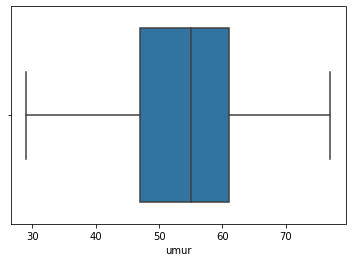

In [34]:
# 1
sns.boxplot(data=acs, x='umur')
# ternyata umur 29 adalah data normal

<AxesSubplot:xlabel='sistolik'>

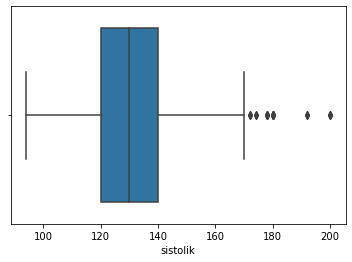

In [13]:
# 2
sns.boxplot(x=acs['sistolik'])
# terdapat data angka sistolik sangat tinggi (>= 170 mmHg)

<AxesSubplot:xlabel='chol'>

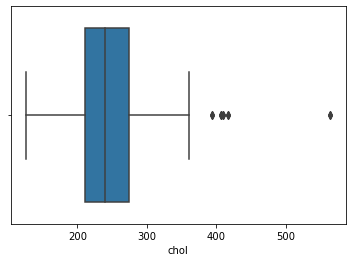

In [14]:
# 3
sns.boxplot(x=acs['chol'])
# terdapat salah satu data kolesterol dengan jumlah sangat tinggi (> 500mg/dL)

<AxesSubplot:xlabel='hrmax'>

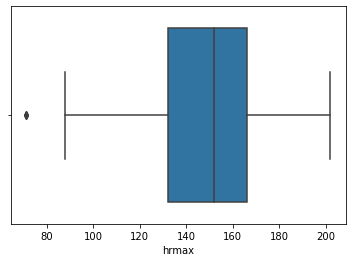

In [15]:
# 4
sns.boxplot(x=acs['hrmax'])
# ada heartrate yang turun < 80 pasca olahraga.

In [16]:
# Membuang Outliers
def drop_outliers(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)

drop_outliers(acs,'sistolik')
drop_outliers(acs,'chol')
drop_outliers(acs,'hrmax')

acs.info()
# index berkurang dari awalnya 1025 menjadi 975 data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   umur       975 non-null    int64
 1   kelamin    975 non-null    int64
 2   gejala     975 non-null    int64
 3   sistolik   975 non-null    int64
 4   chol       975 non-null    int64
 5   gdp        975 non-null    int64
 6   ekg        975 non-null    int64
 7   hrmax      975 non-null    int64
 8   angina_ex  975 non-null    int64
 9   slope      975 non-null    int64
 10  target     975 non-null    int64
dtypes: int64(11)
memory usage: 91.4 KB


<AxesSubplot:xlabel='sistolik'>

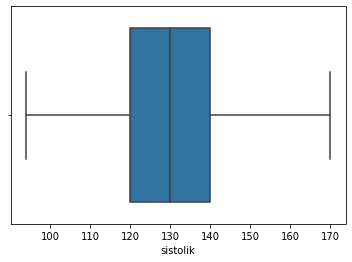

In [38]:
# cek ulang boxplot
sns.boxplot(x=acs['sistolik'])

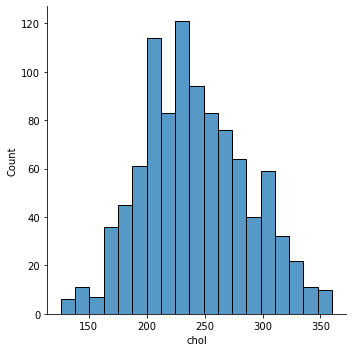

In [36]:
sns.displot(x=acs['chol'])

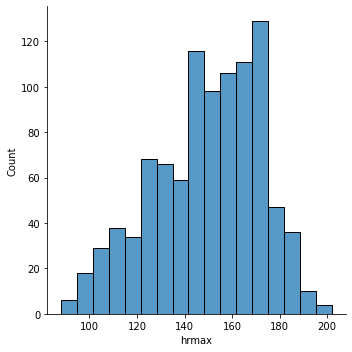

In [37]:
sns.displot(x=acs['hrmax'])

In [20]:
acs.describe()

,umur,kelamin,gejala,sistolik,chol,gdp,ekg,hrmax,angina_ex,slope,target
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,54.101538,0.714872,0.953846,130.025641,242.102564,0.139487,0.531282,149.295385,0.329231,1.400000,0.521026
std,9.104963,0.451707,1.028806,15.372793,45.338989,0.346632,0.521406,22.735758,0.470175,0.614673,0.499814
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,272.000000,0.000000,1.000000,167.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,2.000000,1.000000


In [21]:
# Memastikan tidak ada Missing Value
acs = acs.dropna()
acs

,umur,kelamin,gejala,sistolik,chol,gdp,ekg,hrmax,angina_ex,slope,target
0,52,1,0,125,212,0,1,168,0,2,0
1,53,1,0,140,203,1,0,155,1,0,0
2,70,1,0,145,174,0,1,125,1,0,0
3,61,1,0,148,203,0,1,161,0,2,0
4,62,0,0,138,294,1,1,106,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,2,1
1021,60,1,0,125,258,0,0,141,1,1,0
1022,47,1,0,110,275,0,0,118,1,1,0
1023,50,0,0,110,254,0,0,159,0,2,1


In [22]:
# Data sudah siap

In [23]:
### Membuat Model Regresi Logistik
## Tujuan untuk prognosis outcome ACS muncul atau tidak (target),
## melalui prognostic factor yang telah ditentukan di atas (fitur)

# Memisahkan data fitur dengan target
input = acs.drop(columns=["target"])
output = acs['target']

# Pastikan bentuk dimensi data
print(input.shape, output.shape)
# ada 10 prognostic factor dengan 975 index data (2D)
# dan 975 index output data (1D)

(975, 10) (975,)


In [24]:
# Data lumayan banyak, bagaimana kalau displit beberapa,
# untuk train dan test. Misal ambil 90% saja untuk train, maka:

input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.1, random_state=0)
print('Data Train :',input_train.shape, output_train.shape)
print('Data Test :', input_test.shape, output_test.shape)

Data Train : (877, 10) (877,)
Data Test : (98, 10) (98,)


In [25]:
# Mulai membuat Machine Learning dengan model Regresi Logistik
model = LogisticRegression(solver='liblinear', max_iter=500)

# dipilih liblinear karena lebih menguntungkan pada sampel latih yang sedikit

In [26]:
# Latih Machine Learning
model.fit(input_train,output_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [27]:
# Cobakan pada data test, untuk uji keakuratan data

output_test_prediction = model.predict(input_test)

print(classification_report(output_test,output_test_prediction))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        36
           1       0.78      0.76      0.77        62

    accuracy                           0.71        98
   macro avg       0.69      0.70      0.70        98
weighted avg       0.72      0.71      0.72        98



In [28]:
score = model.score(input_test,output_test)*100
print('Accuracy:',score.round(2),"%")
# Akurasi hanya 71%

Accuracy: 71.43 %


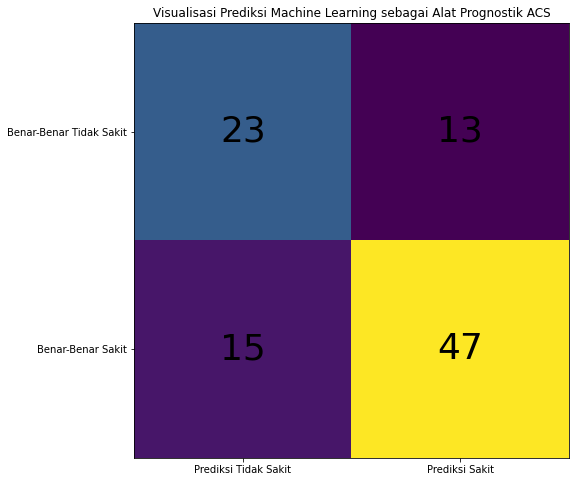

In [29]:
# Visualisasi Machine Learning sebagai Alat Prognostik Penyakit Jantung Koroner
cm = confusion_matrix(output_test, output_test_prediction)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Prediksi Tidak Sakit', 'Prediksi Sakit'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Benar-Benar Tidak Sakit', 'Benar-Benar Sakit'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=36)
plt.title("Visualisasi Prediksi Machine Learning sebagai Alat Prognostik ACS")
plt.show()

In [30]:
# Sensitivitas, Spesifisitas, PPV, NPV
tp = cm[1][1] # true positive
tn = cm[0][0] # true negative
fp = cm[0][1] # false positive
fn = cm[1][0] # false negative
cm
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

True Positives: 47
True Negatives: 23
False Positives: 13
False Negatives: 15


In [31]:
# Sensitivitas: 
# kemampuan menunjukkan prediksi sakit dari yang benar-benar sakit
sn = (tp / (tp + fn))*100
print('Sensitivity:',sn.round(2),'%')

# Spesifisitas:
# kemampuan menunjukkan prediksi tidak sakit dari yang benar-benar tidak sakit
sp = (tn / (tn + fp))*100
print('Specificity:',sp.round(2),'%')

# Nilai Prediksi Positif:
# keyakinan benar-benar sakit dari seluruh prediksi sakit
ppv = (tp/(tp+fp))*100
print('Positive Predictive Value:',ppv.round(2),'%')

# Nilai Prediksi Negatif:
# keyakinan benar-benar tidak sakit dari seluruh prediksi tidak sakit
npv = (tn/(tn+fn))*100
print('Negative Predictive Value:',npv.round(2),'%')

Sensitivity: 75.81 %
Specificity: 63.89 %
Positive Predictive Value: 78.33 %
Negative Predictive Value: 60.53 %


In [32]:
# Selesai.